In [1]:
#CTa-HW05-Pyber

In [2]:
# OBSERVATIONS
# 1) Urban has the most rides and drivers followed by suburban and last rural.
# 2) The more rides there are the lower the ride fares.
# 3) There are more drivers in Urban.

In [3]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in files
city_data = pd.read_csv('Resources/city_data.csv')

ride_data = pd.read_csv('Resources/ride_data.csv')

In [5]:
# shows first 5 lines in city data
city_data.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [6]:
# shows first 5 lines in ride data
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
# Calculates variables

avgfare_percity = ride_data.groupby('city').fare.mean()
rides_percity = ride_data.groupby('city').ride_id.count()

#drivers_percity_type = city_data.groupby('type').driver_count.sum()
#drivers_percity_type.head()

In [8]:
#Create table for 4 key variables, reset index, and rename columns

variables = pd.concat([avgfare_percity, rides_percity], axis=1)
variables.reset_index(inplace=True)
#key_var_summary = key_variables.rename(columns={'city':'city', 'fare':'Fare', 'ride_id': 'Rides', 'driver_count': 'Drivers'})
#key_var_summary.head()

In [9]:
# Combine city/ride data with variables data

merged_cityride = pd.merge(variables, city_data, on="city")

merged_cityride = merged_cityride.rename(columns={'city':'City', 'fare':'Avg_Fare', 'ride_id': 'Rides', 'driver_count': 'Drivers', 
                                                  'type': 'Type'})

merged_cityride.head()

,City,Avg_Fare,Rides,Drivers,Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [10]:
# create table for scatter plot
cityride_summary = pd.DataFrame(merged_cityride)
cityride_summary.head()

,City,Avg_Fare,Rides,Drivers,Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [11]:
# separate by each type and create 3 separate scatter plot graphs on one graph
rural_graph = cityride_summary[cityride_summary["Type"]=="Rural"]
suburban_graph = cityride_summary[cityride_summary["Type"]=="Suburban"]
urban_graph = cityride_summary[cityride_summary["Type"]=="Urban"]

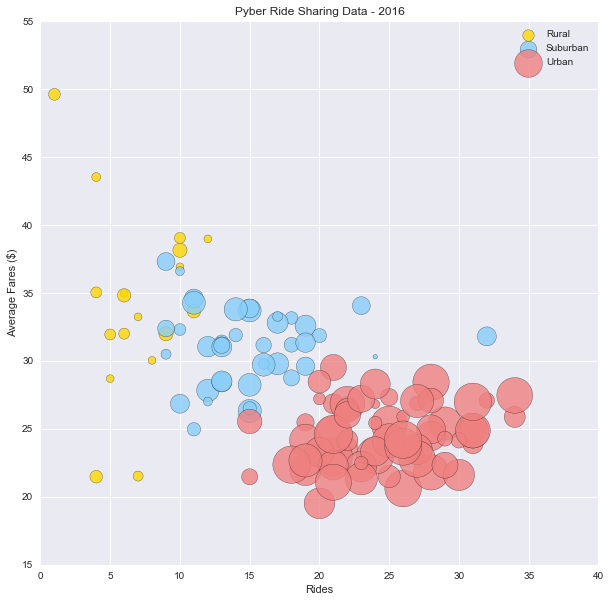

In [30]:
# plot all three graphs on one graph

plt.figure(figsize=(10,10))
rural = plt.scatter(rural_graph['Rides'],rural_graph['Avg_Fare'], c='gold', s=20 *
rural_graph['Drivers'],edgecolors='Black', alpha = 0.8, label='Rural')

suburban = plt.scatter(suburban_graph['Rides'],suburban_graph['Avg_Fare'], c='lightskyblue', s=20 *
suburban_graph['Drivers'],edgecolors='Black', alpha = 0.8, label='Suburban')

urban = plt.scatter(urban_graph['Rides'],urban_graph['Avg_Fare'], c='lightcoral', s=20 *
urban_graph['Drivers'],edgecolors='Black', alpha = 0.8, label='Urban')

plt.ylim(15, 55)
plt.xlim(0, 40)

plt.xlabel("Rides")
plt.ylabel("Average Fares ($)")

plt.legend()

# Prints our scatter plot graph to the screen
print("")
plt.title("Pyber Ride Sharing Data - 2016")
plt.show()


In [13]:
# Combine city/ride data to calculate total fares by city

merged_ride = pd.merge(ride_data, city_data, on="city")

merged_ride = merged_ride.rename(columns={'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id': 'Ride_ID', 
                                          'driver_count': 'Drivers', 'type': 'Type'})

merged_ride.head()

,City,Date,Fare,Ride_ID,Drivers,Type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [14]:
# % of Total Fares by City Type Pie Chart

# total fares by city type
rural_fares = merged_ride[merged_ride["Type"]=="Rural"].sum()["Fare"]
suburban_fares = merged_ride[merged_ride["Type"]=="Suburban"].sum()["Fare"]
urban_fares = merged_ride[merged_ride["Type"]=="Urban"].sum()["Fare"]
total_fares = merged_ride.sum()["Fare"]


# % of fares by city type
rural_fares_percent =(rural_fares/total_fares)*100
suburban_fares_percent =(suburban_fares/total_fares)*100
urban_fares_percent =(urban_fares/total_fares)*100

In [15]:
# Create table for fares
fares_summary = pd.DataFrame({'Rural_Fares_%': [rural_fares_percent],'Suburban_Fares_%': [suburban_fares_percent], 
                                 'Urban_Fares_%': [urban_fares_percent]
                                })

fares_summary = fares_summary.round(2)

In [16]:
# Display fares table
fares_summary 

,Rural_Fares_%,Suburban_Fares_%,Urban_Fares_%
0,6.68,30.35,62.97


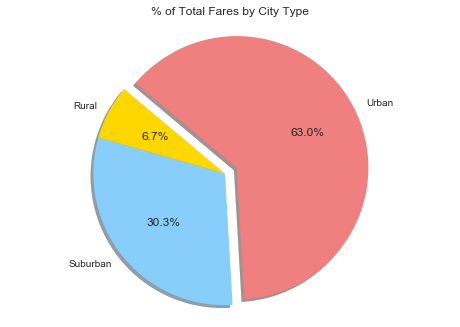

In [17]:
# % of Total Fares by City Type Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [6.68, 30.35, 62.97]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


# Prints our pie chart to the screen
print("")
plt.title("% of Total Fares by City Type")
plt.show()


In [18]:
# % of Total Rides by City Type Pie Chart

# total rides by city type
rural_rides = merged_ride[merged_ride["Type"]=="Rural"].count()["Ride_ID"]
suburban_rides = merged_ride[merged_ride["Type"]=="Suburban"].count()["Ride_ID"]
urban_rides = merged_ride[merged_ride["Type"]=="Urban"].count()["Ride_ID"]
total_rides = merged_ride.count()["Ride_ID"]


# % of rides by city type
rural_rides_percent =(rural_rides/total_rides)*100
suburban_rides_percent =(suburban_rides/total_rides)*100
urban_rides_percent =(urban_rides/total_rides)*100

In [19]:
# Create table for rides
rides_summary = pd.DataFrame({'Rural_Rides_%': [rural_rides_percent],'Suburban_Rides_%': [suburban_rides_percent], 
                                 'Urban_Rides_%': [urban_rides_percent]
                                })

rides_summary = rides_summary.round(2)

In [20]:
# Display table for rides
rides_summary

,Rural_Rides_%,Suburban_Rides_%,Urban_Rides_%
0,5.26,26.32,68.42


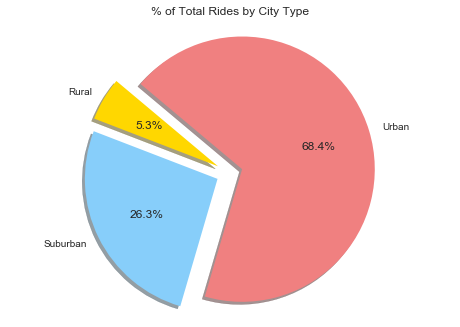

In [21]:
# % of Total Rides by City Type Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5.26, 26.32, 68.42]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0.1, 0.1)


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


# Prints our pie chart to the screen
print("")
plt.title("% of Total Rides by City Type")
plt.show()

In [22]:
# Drivers by City type

drivers_percity = city_data

drivers_percity.head()



,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [23]:
# rename columns
drivers_percity = drivers_percity.rename(columns={'city':'City', 'driver_count': 'Drivers', 'type': 'Type'})

drivers_percity.head()

,City,Drivers,Type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [24]:
# % of Total Drivers by City Type Pie Chart

# total fares by city type
rural_drivers = drivers_percity[drivers_percity["Type"]=="Rural"].sum()["Drivers"]
suburban_drivers = drivers_percity[drivers_percity["Type"]=="Suburban"].sum()["Drivers"]
urban_drivers = drivers_percity[drivers_percity["Type"]=="Urban"].sum()["Drivers"]
total_drivers = drivers_percity.sum()["Drivers"]


# % of fares by city type
rural_drivers_percent =(rural_drivers/total_drivers)*100
suburban_drivers_percent =(suburban_drivers/total_drivers)*100
urban_drivers_percent =(urban_drivers/total_drivers)*100

In [25]:
# Create table for drivers
drivers_summary = pd.DataFrame({'Rural_Drivers_%': [rural_drivers_percent],'Suburban_Drivers_%': [suburban_drivers_percent], 
                                 'Urban_Drivers_%': [urban_drivers_percent]
                                })

drivers_summary =drivers_summary.round(2)

In [26]:
# Display table for drivers
drivers_summary

,Rural_Drivers_%,Suburban_Drivers_%,Urban_Drivers_%
0,3.11,19.05,77.84


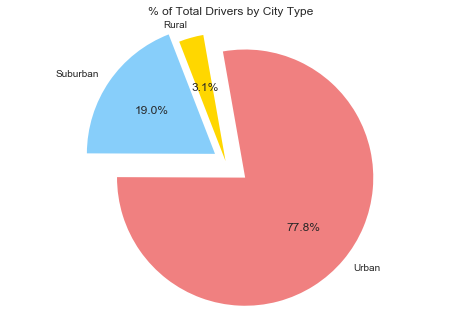

In [27]:
# % of Total Drivers by City Type Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [3.11, 19.05, 77.84]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0.1, 0.2)


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=100)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


# Prints our pie chart to the screen
print("")
plt.title("% of Total Drivers by City Type")
plt.show()